In [1]:
from google.colab import drive
drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit #로지스틱 회귀
from sklearn.tree import DecisionTreeClassifier #의사결정나무(분류)
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트(분류)
from sklearn.ensemble import GradientBoostingClassifier #그래디언트 부스팅(분류)

from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.svm import SVC #SVM

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE

matplotlib.rc("font", family="Malgun Gothic")
plt.rc('font', family='NanumBarunGothic') 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,706 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [3]:
#1. 데이터 구성하기(1)
df_raw = pd.read_csv("/gdrive/MyDrive/POSCO_data_project/data/SCALE불량.csv", encoding='euc-kr')
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2021-08-01:08:00:01,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1125,934,적용,8,2조
1,PB562775,2021-08-01:08:07:11,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1120,937,적용,8,2조
2,PB562776,2021-08-01:08:14:21,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1106,889,적용,8,3조
3,PB562777,2021-08-01:08:21:31,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1113,885,적용,8,3조
4,PB562778,2021-08-01:08:28:41,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1118,873,적용,8,1조


In [4]:
#1. 데이터 구성하기(2)
#slab의 일련번호 삭제

df_raw.drop(["PLATE_NO"], axis=1, inplace=True)
df_raw.head()

,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,2021-08-01:08:00:01,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1열,1144,116,1133,59,282,1125,934,적용,8,2조
1,2021-08-01:08:07:11,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2열,1144,122,1135,53,283,1120,937,적용,8,2조
2,2021-08-01:08:14:21,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1열,1129,116,1121,55,282,1106,889,적용,8,3조
3,2021-08-01:08:21:31,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2열,1152,125,1127,68,316,1113,885,적용,8,3조
4,2021-08-01:08:28:41,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1열,1140,134,1128,48,314,1118,873,적용,8,1조


In [5]:
#1. 데이터 구성하기(3)
#교재에서 변수 MeasDate의 변수 역할에 '제외'라고 되어있으니 drop한다.

df_raw.drop(["ROLLING_DATE"], axis=1, inplace=True)
df_raw.head()

,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1열,1144,116,1133,59,282,1125,934,적용,8,2조
1,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2열,1144,122,1135,53,283,1120,937,적용,8,2조
2,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1열,1129,116,1121,55,282,1106,889,적용,8,3조
3,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2열,1152,125,1127,68,316,1113,885,적용,8,3조
4,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1열,1140,134,1128,48,314,1118,873,적용,8,1조


In [6]:
#1. 데이터 구성하기(4)
#제품 규격의 개수가 많고 목표변수 SCALE에 거의 영향을 주지 않기에 제거한다.
df_raw.drop(["SPEC"], axis=1, inplace=True)
df_raw.head()

,SCALE,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,양품,T1,32.25,3707,15109,14180,1호기,1열,1144,116,1133,59,282,1125,934,적용,8,2조
1,양품,T1,32.25,3707,15109,14180,1호기,2열,1144,122,1135,53,283,1120,937,적용,8,2조
2,양품,T8,33.27,3619,19181,18130,2호기,1열,1129,116,1121,55,282,1106,889,적용,8,3조
3,양품,T8,33.27,3619,19181,18130,2호기,2열,1152,125,1127,68,316,1113,885,적용,8,3조
4,양품,T8,38.33,3098,13334,12430,3호기,1열,1140,134,1128,48,314,1118,873,적용,8,1조


In [7]:
#1. 데이터 구성하기(5)
#아래 로지스틱 회귀분석에서 test data 예측 부분에서 에러가 발생하므로 딱 하나만 있는 C1을 C0로 편입시킨다. 
df_raw = df_raw.replace({'STEEL_KIND':'C1'},'C0')

In [8]:
#1. 데이터 구성하기(6) - 결측치 확인
df_raw.isnull().sum()

SCALE                0
STEEL_KIND           0
PT_THICK             0
PT_WIDTH             0
PT_LENGTH            0
PT_WEIGHT            0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

In [9]:
#1. 데이터 구성하기(7)
df_raw['SCALE'].replace({'불량':1, '양품': 0}, inplace=True)

In [11]:
df_raw.head()

,SCALE,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,T1,32.25,3707,15109,14180,1호기,1열,1144,116,1133,59,282,1125,934,적용,8,2조
1,0,T1,32.25,3707,15109,14180,1호기,2열,1144,122,1135,53,283,1120,937,적용,8,2조
2,0,T8,33.27,3619,19181,18130,2호기,1열,1129,116,1121,55,282,1106,889,적용,8,3조
3,0,T8,33.27,3619,19181,18130,2호기,2열,1152,125,1127,68,316,1113,885,적용,8,3조
4,0,T8,38.33,3098,13334,12430,3호기,1열,1140,134,1128,48,314,1118,873,적용,8,1조


# 1. 탐색적 분석

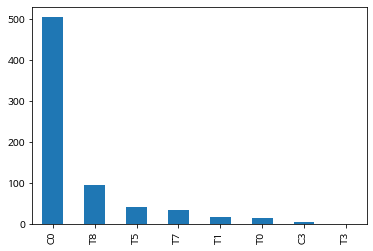

In [ ]:
#2-1. 목표변수와 설명변수 관계 확인
#1-1) STEEL_KIND(강종) - 빈도
df_count_ST = df_raw["STEEL_KIND"].value_counts()
df_count_ST.plot.bar()

## 여러 강종 중 C0의 빈도가 월등히 높다.

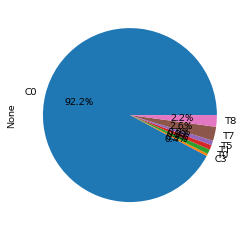

In [ ]:
#1-2) STEEL_KIND(강종)
df_sub_ST = df_raw[df_raw["SCALE"]==1]
df_count_ST = df_sub_ST.groupby(["STEEL_KIND"]).size()
df_count_ST.plot.pie(y="SCALE", autopct="%.1f%%")

## SCALE이 불량인 것 중, C0의 비율이 약 91.8%이다. 즉, C0의 빈도가 높은 만큼 대체로 불량도 C0에서 나온다는 것을 알 수 있었다.

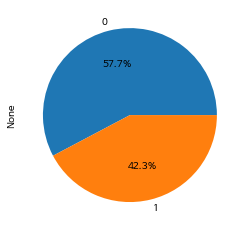

In [ ]:
#1-3) STEEL_KIND(강종)
df_sub_ST = df_raw.query('STEEL_KIND=="C0"')
df_count_ST = df_sub_ST.groupby(["SCALE"]).size()
df_count_ST.plot.pie(y="SCALE", autopct="%.1f%%")

## C0 중 SCALE이 불량인 것이 약 42.1%로 높게 나타나는 것을 볼 수 있다.

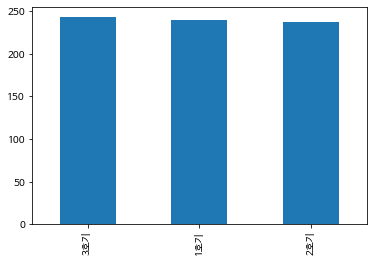

In [ ]:
#2-1) FUR_NO(가열로 호기) - 빈도
df_count_FN = df_raw["FUR_NO"].value_counts()
df_count_FN.plot.bar()

## 1~3호기의 빈도는 대체로 비슷하다.

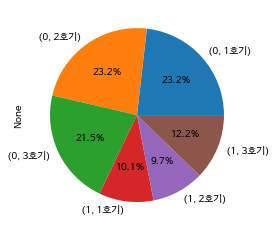

In [ ]:
#2-2) FUR_NO(가열로 호기)
df_count_FN = df_raw.groupby(["SCALE", "FUR_NO"]).size()
df_count_FN.plot.pie(y="SCALE", autopct="%.1f%%")

## 가열로 호기와 SCALE을 그룹핑해서 보았다. SCALE이 불량과 양품일 때, 각각 가열로 호기 별 발생 빈도는 비슷하다. 또한, 위에서 Bar Chart를 통해서 알 수 있듯이 가열로 호기별 빈도가 비슷한 상태이다. 즉, 가열로 호기는 목표변수 SCALE에 큰 영향을 주지는 않는 것으로 보인다.

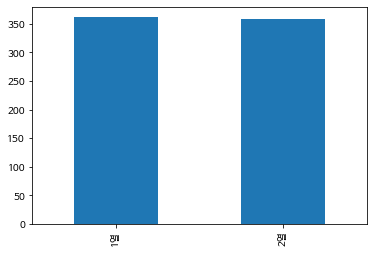

In [ ]:
#3-1) FUR_NO_ROW(가열로 작업 순번) - 빈도
df_count_FNR = df_raw["FUR_NO_ROW"].value_counts()
df_count_FNR.plot.bar()

## 1열과 2열의 빈도는 대체로 비슷하다.

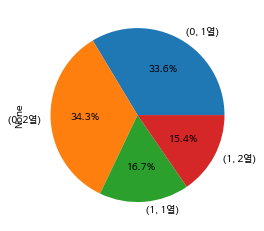

In [ ]:
#3-2) FUR_NO_ROW(가열로 작업 순번)
df_count_FNR = df_raw.groupby(["SCALE", "FUR_NO_ROW"]).size()
df_count_FNR.plot.pie(y="SCALE", autopct="%.1f%%")

## 가열로 작업 순번과 SCALE을 그룹핑해서 보았다. SCALE이 불량과 양품일 때, 각각 가열로 작업 순번 별 발생 빈도는 비슷하다. 또한, 위에서 Bar Chart를 통해서 알 수 있듯이 가열로 작업 순번별 빈도가 비슷한 상태이다. 즉, 가열로 작업 순번은 목표변수 SCALE에 큰 영향을 주지는 않는 것으로 보인다.

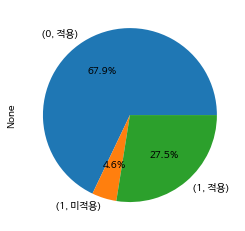

In [ ]:
#4) HSB(Hot Scale Breaker)
df_count_HSB = df_raw.groupby(["SCALE", "HSB"]).size()
df_count_HSB.plot.pie(y="SCALE", autopct="%.1f%%")

## HSB 적용 시, SCALE이 양품일 확률 높으며 반대로 HSB 미적용 시, SCALE이 무조건 불량이라는 것을 알 수 있다.


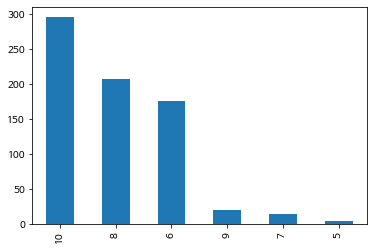

In [ ]:
#5-1) ROLLING_DESCALING(압연 중 Descaling 횟수) - 빈도
df_count_RD = df_raw["ROLLING_DESCALING"].value_counts()
df_count_RD.plot.bar()

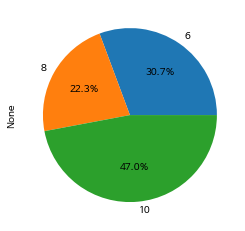

In [ ]:
#5-2) ROLLING_DESCALING(압연 중 Descaling 횟수)
df_sub_RD = df_raw[df_raw["SCALE"]==0]
df_count_RD = df_sub_RD.groupby(["ROLLING_DESCALING"]).size()
df_count_RD.plot.pie(y="ROLLING_DESCALING", autopct="%.1f%%")

## SCALE이 양품인 것만 Pie Chart에 그려보았을 때, 압연 중 Descaling 횟수가 5번, 7번, 9번이 나타나지 않은 것을 알 수 있다. 즉, 5번, 7번, 9번일 때 모두 불량인 것이다.

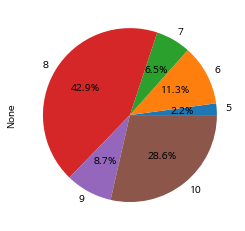

In [ ]:
#5-3) ROLLING_DESCALING(압연 중 Descaling 횟수)
df_sub_RD = df_raw[df_raw["SCALE"]==1]
df_count_RD = df_sub_RD.groupby(["ROLLING_DESCALING"]).size()
df_count_RD.plot.pie(y="ROLLING_DESCALING", autopct="%.1f%%")

## SCALE이 불량인 것만 Pie Chart에 그려보았을 때, 압연 중 Descaling 횟수가 8번일 때 불량이 많이 나타나는 것을 볼 수 있다.

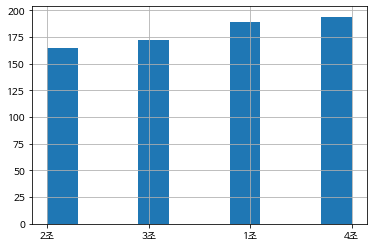

In [ ]:
#6-1) WORK_GR(작업조)
df_raw["WORK_GR"].hist()

## 4조의 빈도가 가장 높다.

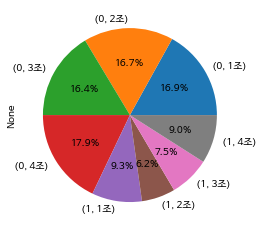

In [ ]:
#6-2) WORK_GR(작업조)
df_count_W = df_raw.groupby(["SCALE", "WORK_GR"]).size()
df_count_W.plot.pie(y="SCALE", autopct="%.1f%%")

## 작업조와 SCALE을 그룹핑해서 보면 1조의 불량률이 가장 높은 것을 확인할 수 있다.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


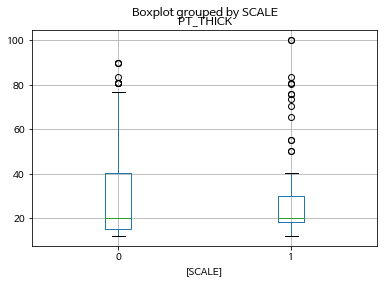

In [ ]:
#7) PT_THICK
df_raw.boxplot(column="PT_THICK", by=["SCALE"])

## Plate 두께가 작을 수록 SCALE이 불량인 것을 확인할 수 있다.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


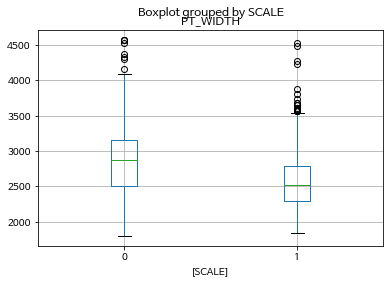

In [ ]:
#8) PT_WIDTH
df_raw.boxplot(column="PT_WIDTH", by=["SCALE"])

## Plate 폭이 작을 수록 SCALE이 불량인 것을 확인할 수 있다.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


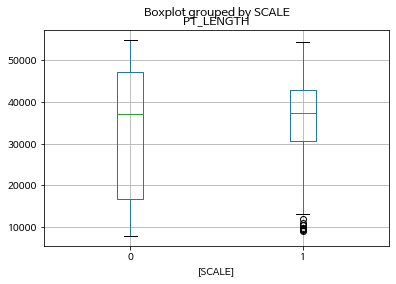

In [ ]:
#9) PT_LENGTH
df_raw.boxplot(column="PT_LENGTH", by=["SCALE"])

## Box Plot을 보면 Plate 길이는 SCALE에 큰 영향을 주지는 않는 것 같다.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


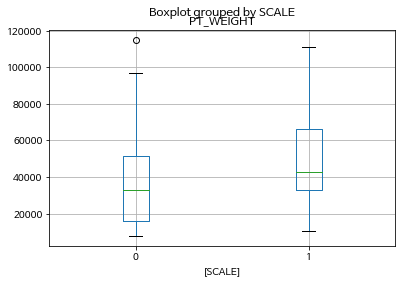

In [ ]:
#10) PT_WEIGHT
df_raw.boxplot(column="PT_WEIGHT", by=["SCALE"])

## Plate 무게가 클 수록 SCALE이 불량인 것을 확인할 수 있다.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


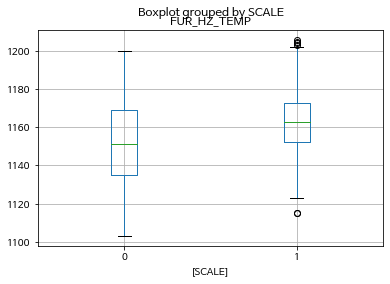

In [ ]:
#11) FUR_HZ_TEMP(가열로 가열대 온도)
df_raw.boxplot(column="FUR_HZ_TEMP", by=["SCALE"])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


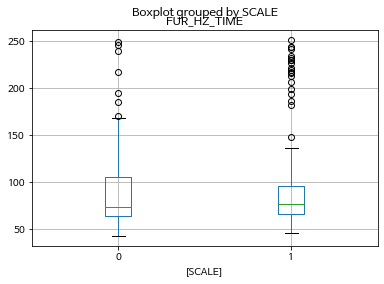

In [ ]:
#12) FUR_HZ_TIME(가열로 가열대 시간)
df_raw.boxplot(column="FUR_HZ_TIME", by=["SCALE"])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


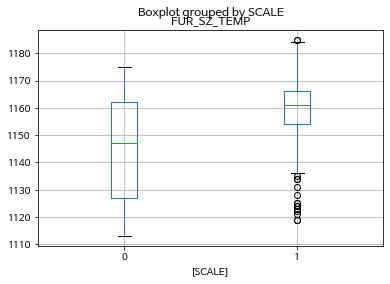

In [ ]:
#13) FUR_SZ_TEMP(가열로 균열대 온도)
df_raw.boxplot(column="FUR_SZ_TEMP", by=["SCALE"])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


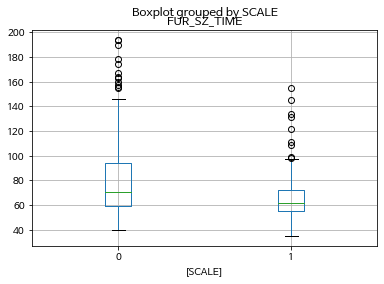

In [ ]:
#14) FUR_SZ_TIME(가열로 균열대 시간)
df_raw.boxplot(column="FUR_SZ_TIME", by=["SCALE"])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


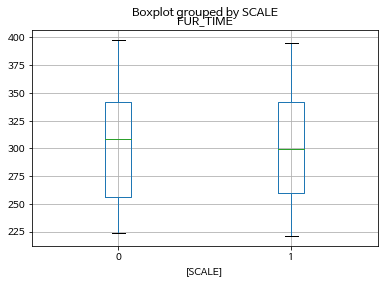

In [ ]:
#15) FUR_TIME(가열로 시간)
df_raw.boxplot(column="FUR_TIME", by=["SCALE"])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


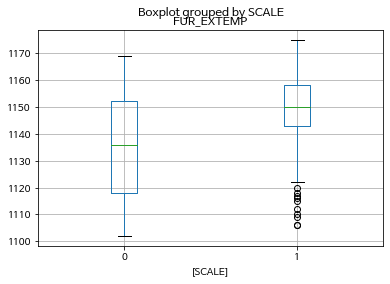

In [ ]:
#16) FUR_EXTEMP(추출온도)
df_raw.boxplot(column="FUR_EXTEMP", by=["SCALE"])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


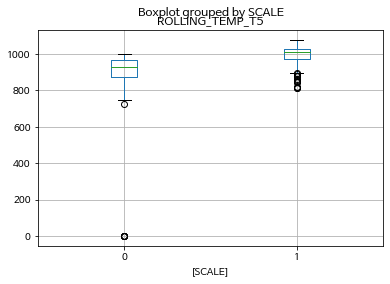

In [ ]:
#17) ROLLING_TEMP_T5(압연온도)
df_raw.boxplot(column="ROLLING_TEMP_T5", by=["SCALE"])

## 위 Box Plot들을 살펴보면 대체로 FUR_HZ_TEMP, FUR_SZ_TEMP, FUR_EXTEMP, ROLLING_TEMP_T5 값이 높을 수록 FUR_HZ_TIME과 FUR_SZ_TIME 값이 작을 수록 SCALE이 불량인 것을 볼 수 있었다. 즉, SCALE 상태는 온도와 시간에 따라 다르다는 것이다.

# 가설 1. 강종은 목표변수 SCALE에 영향을 준다.
# 가설 2. HSB 적용 여부에 따라 목표변수 SCALE에 영향을 준다.
## - HSB 미적용시, SCALE은 불량일 확률이 높다.
# 가설3. ROLLING_DESCALING 횟수에 따라 SCALE에 영향을 준다.
# 가설4. Plate의 두께, 폭, 무게는 SCALE에 영향을 준다.
## - 두께 및 폭이 작을 수록 불량이다.
## - 무게가 나갈 수록 불량이다.
# 가설5. 가열로의 온도 및 시간은 SCALE에 영향을 준다.

# 2. 로지스틱 회귀분석

In [ ]:
#1. 데이터 분할

df_train, df_test = train_test_split(df_raw, test_size=0.3, random_state=1234)

print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

train data size: (504, 18)
test data size: (216, 18)


In [ ]:
df_train.columns

Index(['SCALE', 'STEEL_KIND', 'PT_THICK', 'PT_WIDTH', 'PT_LENGTH', 'PT_WEIGHT',
       'FUR_NO', 'FUR_NO_ROW', 'FUR_HZ_TEMP', 'FUR_HZ_TIME', 'FUR_SZ_TEMP',
       'FUR_SZ_TIME', 'FUR_TIME', 'FUR_EXTEMP', 'ROLLING_TEMP_T5', 'HSB',
       'ROLLING_DESCALING', 'WORK_GR'],
      dtype='object')

In [ ]:
#2. 회귀 모델 생성: 설명변수 전체
log_model = smf.ols(formula="SCALE ~ C(STEEL_KIND) + PT_THICK + PT_WIDTH + PT_LENGTH + PT_WEIGHT + C(FUR_NO) + \
                                + C(FUR_NO_ROW) + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_SZ_TEMP + FUR_SZ_TIME + FUR_TIME \
                                + FUR_EXTEMP + ROLLING_TEMP_T5 + C(HSB) + ROLLING_DESCALING + C(WORK_GR)", data=df_train)
log_result = log_model.fit()
print(log_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  SCALE   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     20.80
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           1.67e-62
Time:                        10:06:57   Log-Likelihood:                -138.79
No. Observations:                 504   AIC:                             331.6
Df Residuals:                     477   BIC:                             445.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -9.2472    

In [ ]:
#3. 회귀 모델 생성 - p-value가 0.05보다 큰 변수 중 가장 큰 것부터 차례로 제거한다.
#1) FUR_EXTEMP 제거
log_model = smf.ols(formula="SCALE ~ C(STEEL_KIND) + PT_THICK + PT_WIDTH + PT_LENGTH + PT_WEIGHT + C(FUR_NO) + \
                                + C(FUR_NO_ROW) + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_SZ_TEMP + FUR_SZ_TIME + FUR_TIME \
                                + ROLLING_TEMP_T5 + C(HSB) + ROLLING_DESCALING + C(WORK_GR)", data=df_train)
log_result = log_model.fit()
print(log_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  SCALE   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     21.67
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           3.56e-63
Time:                        10:06:57   Log-Likelihood:                -138.80
No. Observations:                 504   AIC:                             329.6
Df Residuals:                     478   BIC:                             439.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -9.2452    

In [ ]:
#2) FUR_TIME 제거
log_model = smf.ols(formula="SCALE ~ C(STEEL_KIND) + PT_THICK + PT_WIDTH + PT_LENGTH + PT_WEIGHT + C(FUR_NO) + \
                                + C(FUR_NO_ROW) + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_SZ_TEMP + FUR_SZ_TIME \
                                + ROLLING_TEMP_T5 + C(HSB) + ROLLING_DESCALING + C(WORK_GR)", data=df_train)
log_result = log_model.fit()
print(log_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  SCALE   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     22.62
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           7.45e-64
Time:                        10:06:57   Log-Likelihood:                -138.81
No. Observations:                 504   AIC:                             327.6
Df Residuals:                     479   BIC:                             433.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -9.2369    

In [ ]:
#3) FUR_NO 제거
log_model = smf.ols(formula="SCALE ~ C(STEEL_KIND) + PT_THICK + PT_WIDTH + PT_LENGTH + PT_WEIGHT \
                                + C(FUR_NO_ROW) + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_SZ_TEMP + FUR_SZ_TIME \
                                + ROLLING_TEMP_T5 + C(HSB) + ROLLING_DESCALING + C(WORK_GR)", data=df_train)
log_result = log_model.fit()
print(log_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  SCALE   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     24.72
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           3.95e-65
Time:                        10:06:58   Log-Likelihood:                -139.11
No. Observations:                 504   AIC:                             324.2
Df Residuals:                     481   BIC:                             421.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -9.3330    

In [ ]:
#4) FUR_NO_ROW 제거
log_model = smf.ols(formula="SCALE ~ C(STEEL_KIND) + PT_THICK + PT_WIDTH + PT_LENGTH + PT_WEIGHT \
                                + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_SZ_TEMP + FUR_SZ_TIME \
                                + ROLLING_TEMP_T5 + C(HSB) + ROLLING_DESCALING + C(WORK_GR)", data=df_train)
log_result = log_model.fit()
print(log_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  SCALE   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     25.93
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           8.57e-66
Time:                        10:06:58   Log-Likelihood:                -139.23
No. Observations:                 504   AIC:                             322.5
Df Residuals:                     482   BIC:                             415.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -9.2966    

In [ ]:
#5) FUR_SZ_TIME 제거
log_model = smf.ols(formula="SCALE ~ C(STEEL_KIND) + PT_THICK + PT_WIDTH + PT_LENGTH + PT_WEIGHT \
                                + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_SZ_TEMP \
                                + ROLLING_TEMP_T5 + C(HSB) + ROLLING_DESCALING + C(WORK_GR)", data=df_train)
log_result = log_model.fit()
print(log_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  SCALE   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     27.24
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           2.00e-66
Time:                        10:06:58   Log-Likelihood:                -139.46
No. Observations:                 504   AIC:                             320.9
Df Residuals:                     483   BIC:                             409.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -10.0826    

In [ ]:
#6) FUR_HZ_TEMP 제거
log_result = smf.ols(formula="SCALE ~ C(STEEL_KIND) + PT_THICK + PT_WIDTH + PT_LENGTH + PT_WEIGHT \
                                + FUR_HZ_TIME + FUR_SZ_TEMP \
                                + ROLLING_TEMP_T5 + C(HSB) + ROLLING_DESCALING + C(WORK_GR)", data=df_train)
log_result = log_model.fit()
print(log_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  SCALE   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     27.24
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           2.00e-66
Time:                        10:06:58   Log-Likelihood:                -139.46
No. Observations:                 504   AIC:                             320.9
Df Residuals:                     483   BIC:                             409.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -10.0826    

In [ ]:
#7) PT_WEIGHT 제거
log_model = smf.ols(formula="SCALE ~ C(STEEL_KIND) + PT_THICK + PT_WIDTH + PT_LENGTH \
                                + FUR_HZ_TIME + FUR_SZ_TEMP \
                                + ROLLING_TEMP_T5 + C(HSB) + ROLLING_DESCALING + C(WORK_GR)", data=df_train)
log_result = log_model.fit()
print(log_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  SCALE   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     30.18
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           1.58e-67
Time:                        10:06:59   Log-Likelihood:                -140.40
No. Observations:                 504   AIC:                             318.8
Df Residuals:                     485   BIC:                             399.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -10.4180    

In [ ]:
#8) WORK_GR 제거
log_model = smf.ols(formula="SCALE ~ C(STEEL_KIND) + PT_THICK + PT_WIDTH + PT_LENGTH \
                                + FUR_HZ_TIME + FUR_SZ_TEMP \
                                + ROLLING_TEMP_T5 + C(HSB) + ROLLING_DESCALING ", data=df_train)
log_result = log_model.fit()
print(log_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  SCALE   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     36.03
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           3.05e-69
Time:                        10:06:59   Log-Likelihood:                -141.89
No. Observations:                 504   AIC:                             315.8
Df Residuals:                     488   BIC:                             383.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -10.5499    

## 1. Prob(Omnibus)가 0.05보다 작기에 정규성을 확보했다고 볼 수 있다.
## 2. Durbin-Watson이 2에 가깝기에 독립성을 확보했다고 볼 수 있다.
## 3. Adj. R-squared가 0.511로 해당 회귀식의 설명력은 약 51.1%라고 볼 수 있다.
## 4. 유의수준을 0.05로 가정한다. 따라서 STEEL_KIND, PT_THICK, PT_WIDTH, PT_LENGTH, FUR_HZ_TIME, FUR_SZ_TEMP, ROLLING_TEMP_T5, HSB, ROLLING_DESCALING의 p-value가 유의수준 0.05보다 작기 때문에 해당 설명변수 9개가 통계적으로 유의미하다고 볼 수 있다.

In [ ]:
#4. 예측 - train
y_pred_train = log_result.predict(df_train)
y_pred_train_class = (y_pred_train > 0.5).astype(int)
print("Train 예측 결과\n", y_pred_train_class.head(), "\n")
print("Confusion Matrix\n{}".format(confusion_matrix(df_train["SCALE"], y_pred_train_class)) )

Train 예측 결과
 95     0
427    0
206    1
59     0
13     0
dtype: int64 

Confusion Matrix
[[321  23]
 [ 42 118]]


In [ ]:
#4. 예측 - test
y_pred_test = log_result.predict(df_test)
y_pred_test_class = (y_pred_test > 0.5).astype(int)
print("Test 예측 결과\n", y_pred_test_class.head(), "\n")
print("Confusion Matrix\n{}".format(confusion_matrix(df_test["SCALE"], y_pred_test_class)) )

Test 예측 결과
 146    1
131    1
650    0
613    1
355    0
dtype: int64 

Confusion Matrix
[[131  14]
 [ 17  54]]


In [ ]:
#5. 성능 평가
print("Train 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_train['SCALE'], y_pred_train_class)))
print("Confusion Matrix: {0}\n\n".format(confusion_matrix(df_train['SCALE'], y_pred_train_class)))
print(classification_report(df_train['SCALE'], y_pred_train_class, digits=3))


print("Test 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test['SCALE'], y_pred_test_class)))
print("Confusion Matrix: {0}\n\n".format(confusion_matrix(df_test['SCALE'], y_pred_test_class)))
print(classification_report(df_test['SCALE'], y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy: 0.871

Confusion Matrix: [[321  23]
 [ 42 118]]


              precision    recall  f1-score   support

           0      0.884     0.933     0.908       344
           1      0.837     0.738     0.784       160

    accuracy                          0.871       504
   macro avg      0.861     0.835     0.846       504
weighted avg      0.869     0.871     0.869       504

Test 예측/분류 결과
Accuracy: 0.856

Confusion Matrix: [[131  14]
 [ 17  54]]


              precision    recall  f1-score   support

           0      0.885     0.903     0.894       145
           1      0.794     0.761     0.777        71

    accuracy                          0.856       216
   macro avg      0.840     0.832     0.836       216
weighted avg      0.855     0.856     0.856       216



/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


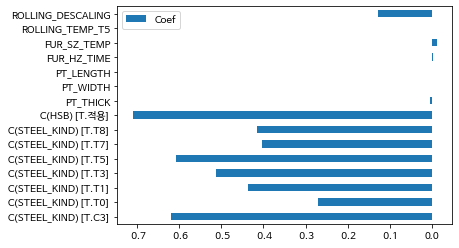

In [ ]:
#6. 결론 도출 - 최종 회귀 계수
df_logistic_coef = pd.DataFrame({"Coef":log_result.params.values[1:]}, index=log_model.exog_names[1:])
df_logistic_coef.plot.barh(y="Coef")

## 결과적으로 HSB, STEEL_KIND, ROLLING_DESCALING이 목표변수 SCALE에 영향을 가장 많이 주는 것을 볼 수 있었다. 하지만 비표준화 회귀계수 기준이기에 완벽히 신뢰할 수는 없다.

# + 번외 - 데이터 Scaling

In [ ]:
#1. 변수 타입에 따라 구분
#numeric 변수에만 scale 변환하기 위해서이다. 
#단, 목표변수 SCALE에는 scaling하지 않는다.

df_object = df_raw.select_dtypes(include="object")
df_numeric = df_raw.select_dtypes(exclude="object") #SCALE 포함
df_SCALE = df_raw["SCALE"]
df_numeric.drop("SCALE", axis=1, inplace=True) #SCALE 미포함

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#2. StandardScaler 적용

scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns=df_numeric.columns)

df_scaled = pd.concat([df_SCALE, df_numeric_scaled, df_object])

df_scaled.head()

,0,FUR_EXTEMP,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_NO,FUR_NO_ROW,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,HSB,PT_LENGTH,PT_THICK,PT_WEIGHT,PT_WIDTH,ROLLING_DESCALING,ROLLING_TEMP_T5,STEEL_KIND,WORK_GR
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 표준화 회귀계수를 위해 scaling을 진행했으나 scaling 결과 NaN 값이 나오기에 비표준화 회귀계수를 활용했다.

# 2. Over-Sampling: SMOTE - 더미변수
### **Oversampling은 train data에만 적용해야 하는 것을 유의한다.**

In [12]:
#1. 데이터 구성 - 더미변수 생성
df_raw_dummy = pd.get_dummies(df_raw)

df_dummy_x = df_raw_dummy.drop("SCALE", axis=1, inplace=False)
df_dummy_y = df_raw_dummy["SCALE"]

In [14]:
df_raw_dummy.head()

,SCALE,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,FUR_NO_2호기,FUR_NO_3호기,FUR_NO_ROW_1열,FUR_NO_ROW_2열,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,0,32.25,3707,15109,14180,1144,116,1133,59,282,...,0,0,1,0,0,1,0,1,0,0
1,0,32.25,3707,15109,14180,1144,122,1135,53,283,...,0,0,0,1,0,1,0,1,0,0
2,0,33.27,3619,19181,18130,1129,116,1121,55,282,...,1,0,1,0,0,1,0,0,1,0
3,0,33.27,3619,19181,18130,1152,125,1127,68,316,...,1,0,0,1,0,1,0,0,1,0
4,0,38.33,3098,13334,12430,1140,134,1128,48,314,...,0,1,1,0,0,1,1,0,0,0


In [15]:
#1. 데이터분할
df_dummy_train_x, df_dummy_test_x, df_dummy_train_y, df_dummy_test_y = train_test_split(df_dummy_x, df_dummy_y, test_size=0.3, random_state=1234)

print("train data size: {}".format(df_dummy_train_x.shape))
print("test data size: {}".format(df_dummy_test_x.shape))

train data size: (504, 31)
test data size: (216, 31)


In [16]:
#2. Over-Sampling: SMOTE(1) - 목표변수 빈도 확인
print(df_raw_dummy.value_counts(["SCALE"], "\n"))

SCALE
0        0.679167
1        0.320833
dtype: float64


## SCALE이 0(양품)과 1(불량)인 데이터의 비율이 서로 동일하지 않다는 것을 확인했다. 따라서 over-sampling을 통해 두 그룹의 데이터 개수를 맞춰주도록 한다. 

In [17]:
#2. Over-Sampling: SMOTE(2)

sm = SMOTE(sampling_strategy='auto')

x_resampled_dummy, y_resampled_dummy = sm.fit_resample(df_dummy_train_x, df_dummy_train_y)

print("Over-sampling 전:")
print(df_dummy_train_y.value_counts(),"\n")
print("Over-sampling 후 Train X:\n", x_resampled_dummy.shape)
print("Over-sampling 전 Train Y:\n", y_resampled_dummy.shape,"\n")
print("Over-sampling 후 '1':\n", sum((y_resampled_dummy==1)))
print("Over-sampling 후 '0':\n", sum((y_resampled_dummy==0)),"\n")

Over-sampling 전:
0    344
1    160
Name: SCALE, dtype: int64 

Over-sampling 후 Train X:
 (688, 31)
Over-sampling 전 Train Y:
 (688,) 

Over-sampling 후 '1':
 344
Over-sampling 후 '0':
 344 



In [18]:
#2. Over-Sampling: SMOTE(3) - 데이터 결합

df_resampled_dummy = pd.concat([x_resampled_dummy, y_resampled_dummy], axis=1)
print(df_resampled_dummy.head())

   PT_THICK  PT_WIDTH  PT_LENGTH  PT_WEIGHT  FUR_HZ_TEMP  FUR_HZ_TIME  \
0     14.09      3284      51234      93050         1142           75   
1     38.43      3129      16187      15280         1132           63   
2     30.13      2288      30730      33260         1153           74   
3     65.64      2498      11987      15430         1137          109   
4     30.23      1940      34797      16020         1119          130   

   FUR_SZ_TEMP  FUR_SZ_TIME  FUR_TIME  FUR_EXTEMP  ...  FUR_NO_3호기  \
0         1131          122       353        1125  ...           0   
1         1134          109       280        1121  ...           1   
2         1155           94       285        1146  ...           0   
3         1132           73       352        1127  ...           1   
4         1120           65       324        1112  ...           0   

   FUR_NO_ROW_1열  FUR_NO_ROW_2열  HSB_미적용  HSB_적용  WORK_GR_1조  WORK_GR_2조  \
0              1              0        0       1           1    

# 3. Oversampling한 더미변수에 Scaling 진행
### **Scaling은 train 및 test data 모두 적용해야 하는 것을 유의한다. 또한, 두 데이터에 동일한 scaler를 사용해야 하는 것도 주의한다.**

In [19]:
#1.x_resampled_dummy와 df_dummy_test_x를 scaling
#train data와 test data 모두 동일한 scaler를 통해 scaling을 진행해야 한다.

#1) x_resampled_dummy(train data) scaling 진행
scaler = StandardScaler()
x_ss_dummy = scaler.fit_transform(x_resampled_dummy)
df_x_ss_dummy = pd.DataFrame(x_ss_dummy, columns=x_resampled_dummy.columns)
df_x_ss_dummy.head()

#2) df_dummy_test_x(test data) scaling 진행
x_scaled_test = scaler.fit_transform(df_dummy_test_x)
df_x_scaled_test = pd.DataFrame(x_scaled_test, columns=df_dummy_test_x.columns)
df_x_scaled_test.head()

,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,...,FUR_NO_2호기,FUR_NO_3호기,FUR_NO_ROW_1열,FUR_NO_ROW_2열,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,-0.348369,-0.359080,1.093101,-0.752831,0.701995,0.013369,0.938511,-0.897102,-0.060732,0.993753,...,-0.692425,1.343575,-1.018693,1.018693,-0.220326,0.220326,-0.627334,-0.527358,-0.541676,1.631262
1,-0.563587,-0.579292,0.557607,0.848553,0.507409,1.140940,0.879288,-0.398771,0.429251,1.169599,...,-0.692425,1.343575,-1.018693,1.018693,-0.220326,0.220326,-0.627334,-0.527358,1.846121,-0.613022
2,-0.884293,-0.135004,1.422996,0.069864,0.701995,-0.481662,0.642399,-0.245438,-0.884795,0.524827,...,1.444200,-0.744283,-1.018693,1.018693,-0.220326,0.220326,-0.627334,-0.527358,-0.541676,1.631262
3,-0.453328,-0.851660,-0.032723,1.019547,0.701995,-0.289150,0.405509,-0.283772,0.941506,0.348980,...,1.444200,-0.744283,0.981650,-0.981650,-0.220326,0.220326,-0.627334,1.896245,-0.541676,-0.613022
4,-0.269916,3.390330,-1.296661,-1.096913,0.166884,-0.316652,0.523954,-0.360438,-1.040698,0.407596,...,1.444200,-0.744283,-1.018693,1.018693,-0.220326,0.220326,-0.627334,-0.527358,-0.541676,1.631262


# 4. Oversampling하지 않은 더미변수에 Scaling 진행
### **Scaling은 train 및 test data 모두 적용해야 하는 것을 유의한다. 또한, 두 데이터에 동일한 scaler를 사용해야 하는 것도 주의한다.**

In [20]:
#1.df_dummy_train_x과 df_dummy_test_x를 scaling
#train data와 test data 모두 동일한 scaler를 통해 scaling을 진행해야 한다.

#1) df_dummy_train_x(train data) scaling 진행
scaler = StandardScaler()
x_scaled_train = scaler.fit_transform(df_dummy_train_x)
df_x_scaled_train = pd.DataFrame(x_scaled_train, columns=df_dummy_train_x.columns)
df_x_scaled_train.head()

#2) df_dummy_test_x(test data) scaling 진행
x_scaled_test = scaler.fit_transform(df_dummy_test_x)
df_x_scaled_test = pd.DataFrame(x_scaled_test, columns=df_dummy_test_x.columns)
df_x_scaled_test.head()

,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,...,FUR_NO_2호기,FUR_NO_3호기,FUR_NO_ROW_1열,FUR_NO_ROW_2열,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,-0.348369,-0.359080,1.093101,-0.752831,0.701995,0.013369,0.938511,-0.897102,-0.060732,0.993753,...,-0.692425,1.343575,-1.018693,1.018693,-0.220326,0.220326,-0.627334,-0.527358,-0.541676,1.631262
1,-0.563587,-0.579292,0.557607,0.848553,0.507409,1.140940,0.879288,-0.398771,0.429251,1.169599,...,-0.692425,1.343575,-1.018693,1.018693,-0.220326,0.220326,-0.627334,-0.527358,1.846121,-0.613022
2,-0.884293,-0.135004,1.422996,0.069864,0.701995,-0.481662,0.642399,-0.245438,-0.884795,0.524827,...,1.444200,-0.744283,-1.018693,1.018693,-0.220326,0.220326,-0.627334,-0.527358,-0.541676,1.631262
3,-0.453328,-0.851660,-0.032723,1.019547,0.701995,-0.289150,0.405509,-0.283772,0.941506,0.348980,...,1.444200,-0.744283,0.981650,-0.981650,-0.220326,0.220326,-0.627334,1.896245,-0.541676,-0.613022
4,-0.269916,3.390330,-1.296661,-1.096913,0.166884,-0.316652,0.523954,-0.360438,-1.040698,0.407596,...,1.444200,-0.744283,-1.018693,1.018693,-0.220326,0.220326,-0.627334,-0.527358,-0.541676,1.631262


# 5. 데이터 별 성능 비교(단, 기본옵션 모델 사용)
## 5-1 더미변수
## 5-2. Oversampling만 적용한 더미변수
## 5-3. Oversampling 및 Scaling한 더미변수
## 5-4. Scaling만 적용한 더미변수

# 5-1. 더미변수

In [ ]:
#1) Decision Tree
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_dummy_train_x, df_dummy_train_y)

print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_dummy_train_x, df_dummy_train_y)))
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_dummy_test_x, df_dummy_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [ ]:
#2) Random Forest
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_dummy_train_x, df_dummy_train_y)

print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(df_dummy_train_x, df_dummy_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(df_dummy_test_x, df_dummy_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [ ]:
#3) Gradient Boosting
gb_uncustomized = GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(df_dummy_train_x, df_dummy_train_y)

print("Accuracy on training set: {:.3f}".format(gb_uncustomized.score(df_dummy_train_x, df_dummy_train_y)))
print("Accuracy on test set: {:.3f}".format(gb_uncustomized.score(df_dummy_test_x, df_dummy_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [ ]:
#4) SVM
svm_uncustomized = SVC(random_state= 1234)
svm_uncustomized.fit(df_dummy_train_x, df_dummy_train_y)

print('Accuracy on training set: {:.3f}'.format(svm_uncustomized.score(df_dummy_train_x, df_dummy_train_y)))
print('Accuracy on test set: {:.3f}'.format(svm_uncustomized.score(df_dummy_test_x, df_dummy_test_y)))

Accuracy on training set: 0.683
Accuracy on test set: 0.671


In [ ]:
#5) KNN
knn_uncusotomized = KNeighborsClassifier()
knn_uncusotomized.fit(df_dummy_train_x, df_dummy_train_y)

print('Accuracy on training set: {:.3f}'.format(knn_uncusotomized.score(df_dummy_train_x, df_dummy_train_y)))
print('Accuracy on test set: {:.3f}'.format(knn_uncusotomized.score(df_dummy_test_x, df_dummy_test_y)))

Accuracy on training set: 0.788
Accuracy on test set: 0.764


# 5-2. Oversampling만 적용한 더미변수

In [ ]:
#1) Decision Tree
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(x_resampled_dummy, y_resampled_dummy)

print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(x_resampled_dummy, y_resampled_dummy)))
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_dummy_test_x, df_dummy_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.981


In [ ]:
#2) Random Forest
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(x_resampled_dummy, y_resampled_dummy)

print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(x_resampled_dummy, y_resampled_dummy)))
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(df_dummy_test_x, df_dummy_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.931


In [ ]:
#3) Gradient Boosting
gb_uncustomized = GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(x_resampled_dummy, y_resampled_dummy)

print("Accuracy on training set: {:.3f}".format(gb_uncustomized.score(x_resampled_dummy, y_resampled_dummy)))
print("Accuracy on test set: {:.3f}".format(gb_uncustomized.score(df_dummy_test_x, df_dummy_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.995


In [ ]:
#4) SVM
svm_uncustomized = SVC(random_state= 1234)
svm_uncustomized.fit(x_resampled_dummy, y_resampled_dummy)

print('Accuracy on training set: {:.3f}'.format(svm_uncustomized.score(x_resampled_dummy, y_resampled_dummy)))
print('Accuracy on test set: {:.3f}'.format(svm_uncustomized.score(df_dummy_test_x, df_dummy_test_y)))

Accuracy on training set: 0.663
Accuracy on test set: 0.625


In [ ]:
#5) KNN
knn_uncusotomized = KNeighborsClassifier()
knn_uncusotomized.fit(x_resampled_dummy, y_resampled_dummy)

print('Accuracy on training set: {:.3f}'.format(knn_uncusotomized.score(x_resampled_dummy, y_resampled_dummy)))
print('Accuracy on test set: {:.3f}'.format(knn_uncusotomized.score(df_dummy_test_x, df_dummy_test_y)))

Accuracy on training set: 0.824
Accuracy on test set: 0.708


# 5-3. Oversampling 및 Scaling한 더미변수

In [ ]:
#1) Decision Tree
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(x_ss_dummy, y_resampled_dummy)

print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(x_ss_dummy, y_resampled_dummy)))
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(x_scaled_test, df_dummy_test_y)))


Accuracy on training set: 1.000
Accuracy on test set: 0.810


In [ ]:
#2) Random Forest
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(x_ss_dummy, y_resampled_dummy)

print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(x_ss_dummy, y_resampled_dummy)))
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(x_scaled_test, df_dummy_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.824


In [ ]:
#3) Gradient Boosting
gb_uncustomized = GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(x_ss_dummy, y_resampled_dummy)

print("Accuracy on training set: {:.3f}".format(gb_uncustomized.score(x_ss_dummy, y_resampled_dummy)))
print("Accuracy on test set: {:.3f}".format(gb_uncustomized.score(x_scaled_test, df_dummy_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.833


In [ ]:
#4) SVM
svm_uncustomized = SVC(random_state= 1234)
svm_uncustomized.fit(x_ss_dummy, y_resampled_dummy)

print('Accuracy on training set: {:.3f}'.format(svm_uncustomized.score(x_ss_dummy, y_resampled_dummy)))
print('Accuracy on test set: {:.3f}'.format(svm_uncustomized.score(x_scaled_test, df_dummy_test_y)))

Accuracy on training set: 0.945
Accuracy on test set: 0.815


In [ ]:
#5) KNN
knn_uncusotomized = KNeighborsClassifier()
knn_uncusotomized.fit(x_ss_dummy, y_resampled_dummy)

print('Accuracy on training set: {:.3f}'.format(knn_uncusotomized.score(x_ss_dummy, y_resampled_dummy)))
print('Accuracy on test set: {:.3f}'.format(knn_uncusotomized.score(x_scaled_test, df_dummy_test_y)))

Accuracy on training set: 0.923
Accuracy on test set: 0.792


# 5-4. Scaling만 적용한 더미변수

In [ ]:
#1) Decision Tree
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(x_scaled_train, df_dummy_train_y)

print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(x_scaled_train, df_dummy_train_y)))
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(x_scaled_test, df_dummy_test_y)))


Accuracy on training set: 1.000
Accuracy on test set: 0.847


In [ ]:
#2) Random Forest
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(x_scaled_train, df_dummy_train_y)

print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(x_scaled_train, df_dummy_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(x_scaled_test, df_dummy_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.843


In [ ]:
#3) Gradient Boosting
gb_uncustomized = GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(x_scaled_train, df_dummy_train_y)

print("Accuracy on training set: {:.3f}".format(gb_uncustomized.score(x_scaled_train, df_dummy_train_y)))
print("Accuracy on test set: {:.3f}".format(gb_uncustomized.score(x_scaled_test, df_dummy_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.870


In [ ]:
#4) SVM
svm_uncustomized = SVC(random_state= 1234)
svm_uncustomized.fit(x_scaled_train, df_dummy_train_y)

print('Accuracy on training set: {:.3f}'.format(svm_uncustomized.score(x_scaled_train, df_dummy_train_y)))
print('Accuracy on test set: {:.3f}'.format(svm_uncustomized.score(x_scaled_test, df_dummy_test_y)))

Accuracy on training set: 0.911
Accuracy on test set: 0.861


In [ ]:
#5) KNN
knn_uncusotomized = KNeighborsClassifier()
knn_uncusotomized.fit(x_scaled_train, df_dummy_train_y)

print('Accuracy on training set: {:.3f}'.format(knn_uncusotomized.score(x_scaled_train, df_dummy_train_y)))
print('Accuracy on test set: {:.3f}'.format(knn_uncusotomized.score(x_scaled_test, df_dummy_test_y)))

Accuracy on training set: 0.887
Accuracy on test set: 0.810


## Test accuracy를 기준으로,
## 1) Decision Tree는 "Oversampling만 적용한 더미변수" 데이터에서 가장 정확도가 높다.
## 2) Random Forest와 Gradient Forest는 "더미변수" 데이터에서 가장 정확도가 높다. 
## 3) SVM과 KNN은 "Scaling만 적용한 더미변수" 데이터에서 가장 정확도 높다.

## 대체적으로 트리 모델들은 Scaling을 적용한 데이터에서 성능이 낮게 나오며 Oversampling을 통해 데이터를 충당해야 성능이 좋게 나오는 것을 알 수 있다.

## 반면에, SVM과 KNN은 Scaling을 적용한 데이터를 사용하는 것이 성능을 높이는 데 영향을 준다는 것을 알 수 있다.

# 6. Decision Tree
## 파라미터 조정을 통해 최적의 모델을 찾는 과정을 진행한다. 이때, "Oversampling만 적용한 더미변수" 데이터를 사용한다.

In [ ]:
#1. 범위 지정
para_depth = [depth for depth in range(1, 11)]
para_split = [n_split * 2 for n_split in range(1,21)]
para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

In [ ]:
#2. GridSearchCV를 이용한 최적의 파라미터 찾기
estimator = DecisionTreeClassifier(random_state=1234)

param_grid = {"max_depth": para_depth, "min_samples_split": para_split, \
              "min_samples_leaf": para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_dt.fit(x_resampled_dummy, y_resampled_dummy)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=30,
                       random_state=1234)

best parameter: 
{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 30}

best score: 
0.971


In [ ]:
#3. 최종 모델 선정
tree_final = DecisionTreeClassifier(random_state=1234, max_depth=8, min_samples_split=30, \
                                 min_samples_leaf=2)
tree_final.fit(x_resampled_dummy, y_resampled_dummy)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=30,
                       random_state=1234)

In [ ]:
#4. 최종 모델 평가
y_pred = tree_final.predict(df_dummy_test_x)
print("Train Accuracy: {:.3f}".format(tree_final.score(x_resampled_dummy, y_resampled_dummy)))
print("Test Accuracy: {:.3f}".format(tree_final.score(df_dummy_test_x, df_dummy_test_y)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_dummy_test_y, y_pred)))
print(classification_report(df_dummy_test_y, y_pred, digits=3))

Train Accuracy: 0.983
Test Accuracy: 0.972
Confusion Matrix: 
[[139   6]
 [  0  71]]
              precision    recall  f1-score   support

           0      1.000     0.959     0.979       145
           1      0.922     1.000     0.959        71

    accuracy                          0.972       216
   macro avg      0.961     0.979     0.969       216
weighted avg      0.974     0.972     0.972       216



In [ ]:
#4. 결론 도출(1) - 설명변수의 중요도 결과

#변수명 저장
v_feature_name = x_resampled_dummy.columns

df_importance= pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

#df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
10,ROLLING_TEMP_T5,0.492
26,HSB_적용,0.220
11,ROLLING_DESCALING,0.132
6,FUR_SZ_TEMP,0.104
0,PT_THICK,0.046
3,PT_WEIGHT,0.003
5,FUR_HZ_TIME,0.003
24,FUR_NO_ROW_2열,0.000
20,FUR_NO_1호기,0.000
21,FUR_NO_2호기,0.000


Text(0, 0.5, 'Feature')

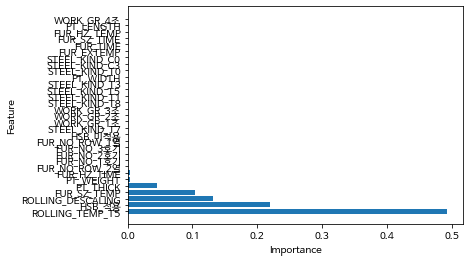

In [ ]:
#4. 결론 도출(2) - 설명변수 중요도 그래프
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Importance")
plt.ylabel("Feature")

## ROLLING_TEMP_T5, HSB 적용, ROLLING_DESCALING, FUR_SZ_TEMP, PT_THICK 순으로 목표변수 SCALE에 영향을 주는 주요요인으로 뽑을 수 있다.

# 7. Random Forest
## 파라미터 조정을 통해 최적의 모델을 찾는 과정을 진행한다. 이때, "더미변수" 데이터를 사용한다.

In [ ]:
#1. 모델 파라미터 조정(1) - n_estimators

test_accuracy = []
train_accuracy = []

para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(random_state=1234, n_estimators=v_n_estimators)
    rf.fit(df_dummy_train_x, df_dummy_train_y)
    train_accuracy.append(rf.score(df_dummy_train_x, df_dummy_train_y))
    test_accuracy.append(rf.score(df_dummy_test_x, df_dummy_test_y))
    
#결과 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy

#모델 설명력 확인
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.994,0.963
1,20,0.998,0.968
2,30,1.000,0.968
3,40,1.000,0.972
4,50,1.000,0.977
5,60,1.000,0.972
6,70,1.000,0.972
7,80,1.000,0.972
8,90,1.000,0.972
9,100,1.000,0.972


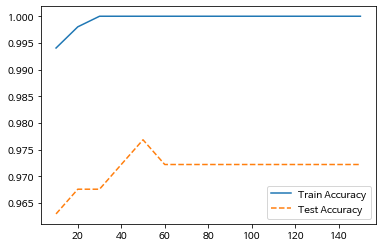

In [ ]:
plt.plot(para_n_tree, train_accuracy, linestyle='-', label="Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle='--', label="Test Accuracy")
plt.legend()

## train과 test 데이터의 성능 변화를 고려해 n_estimators를 50으로 설정한다.

In [ ]:
#1. 모델 파라미터 조정(2) - min_samples_split

test_accuracy = []
train_accuracy = []

para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(random_state=1234,\
            n_estimators=50, min_samples_split=v_min_samples_split)
    rf.fit(df_dummy_train_x, df_dummy_train_y)
    train_accuracy.append(rf.score(df_dummy_train_x, df_dummy_train_y))
    test_accuracy.append(rf.score(df_dummy_test_x, df_dummy_test_y))
    
#결과 저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainAccuracy'] = train_accuracy
df_score_split['TestAccuracy'] = test_accuracy

#모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.992,0.968
1,20,0.978,0.968
2,30,0.970,0.972
3,40,0.962,0.968
4,50,0.964,0.968
5,60,0.960,0.968
6,70,0.958,0.958
7,80,0.954,0.958
8,90,0.954,0.963
9,100,0.940,0.926


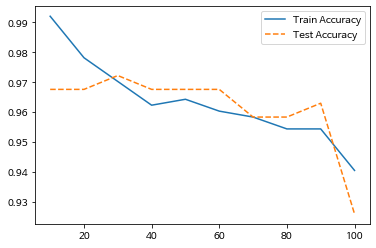

In [ ]:
plt.plot(para_split, train_accuracy, linestyle='-', label="Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle='--', label="Test Accuracy")
plt.legend()

## train_score와 test_score의 값을 서로 고려하며 분리 노드의 최소 자료 수를 30으로 지정한다.

In [ ]:
#2. 범위 지정
para_depth = [depth for depth in range(1, 11)]
para_leaf = [n_leaf * 2 for n_leaf in range(1,21)]

In [ ]:
#3. GridSearchCV를 이용한 최적의 파라미터 찾기
estimator = RandomForestClassifier(random_state=1234,\
            n_estimators=50, min_samples_split=30)

param_grid = {"max_depth": para_depth, "min_samples_leaf": para_leaf}

grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_rf.fit(df_dummy_train_x, df_dummy_train_y)

print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=30,
                       n_estimators=50, random_state=1234)

best parameter: 
{'max_depth': 7, 'min_samples_leaf': 2}

best score: 
0.944


In [ ]:
#4. 최종 모델 선정
rf_final = RandomForestClassifier(random_state=1234,\
        n_estimators=50, max_depth=7, min_samples_split=30, min_samples_leaf=2)
rf_final.fit(df_dummy_train_x, df_dummy_train_y)

RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=30,
                       n_estimators=50, random_state=1234)

In [ ]:
#5. 최종 모델 평가
y_pred = rf_final.predict(df_dummy_test_x)
print("Train Accuracy: {:.3f}".format(rf_final.score(df_dummy_train_x, df_dummy_train_y)))
print("Test Accuracy: {:.3f}".format(rf_final.score(df_dummy_test_x, df_dummy_test_y)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_dummy_test_y, y_pred)))
print(classification_report(df_dummy_test_y, y_pred, digits=3))

Train Accuracy: 0.962
Test Accuracy: 0.968
Confusion Matrix: 
[[145   0]
 [  7  64]]
              precision    recall  f1-score   support

           0      0.954     1.000     0.976       145
           1      1.000     0.901     0.948        71

    accuracy                          0.968       216
   macro avg      0.977     0.951     0.962       216
weighted avg      0.969     0.968     0.967       216



In [ ]:
#6. 결론 도출(1) - 설명변수의 중요도 결과

#변수명 저장
v_feature_name = df_dummy_train_x.columns

df_importance= pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

#df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
10,ROLLING_TEMP_T5,0.331
6,FUR_SZ_TEMP,0.098
9,FUR_EXTEMP,0.092
1,PT_WIDTH,0.065
11,ROLLING_DESCALING,0.064
26,HSB_적용,0.055
25,HSB_미적용,0.053
0,PT_THICK,0.040
12,STEEL_KIND_C0,0.036
2,PT_LENGTH,0.034


Text(0, 0.5, 'Feature')

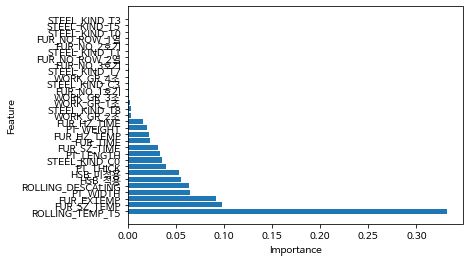

In [ ]:
#6. 결론 도출(2) - 설명변수 중요도 그래프
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Importance")
plt.ylabel("Feature")

## ROLLING_TEMP_T5, FUR_SZ_TEMP, FUR_EXTEMP 순으로 목표변수 SCALE에 영향을 주는 요인을 주요요인으로 뽑을 수 있다.

# 8. Gradient Boosting
## 파라미터 조정을 통해 최적의 모델을 찾는 과정을 진행한다. 이때, "더미변수" 데이터를 사용한다.

In [ ]:
#1. 모델 파라미터 조정(1) - n_estimators

test_accuracy = []
train_accuracy = []

para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(random_state=1234, n_estimators=v_n_estimators)
    gb.fit(df_dummy_train_x, df_dummy_train_y)
    train_accuracy.append(gb.score(df_dummy_train_x, df_dummy_train_y))
    test_accuracy.append(gb.score(df_dummy_test_x, df_dummy_test_y))
    
#결과 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy

#모델 설명력 확인
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.958,0.972
1,20,0.966,0.977
2,30,0.974,0.977
3,40,0.992,0.981
4,50,0.992,0.981
5,60,0.998,0.986
6,70,1.000,0.991
7,80,1.000,1.000
8,90,1.000,1.000
9,100,1.000,1.000


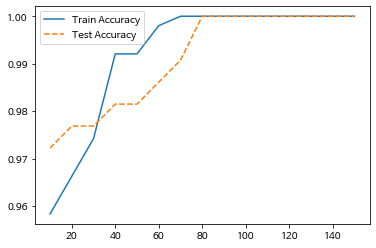

In [ ]:
plt.plot(para_n_tree, train_accuracy, linestyle='-', label="Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle='--', label="Test Accuracy")
plt.legend()

# train_score와 test_score의 값을 서로 고려하며 트리의 수를 80개로 지정한다.

In [ ]:
#1. 모델 파라미터 조정(2) - min_samples_split

test_accuracy = []
train_accuracy = []

para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(random_state=1234, n_estimators=80, \
                                  min_samples_split=v_min_samples_split)
    gb.fit(df_dummy_train_x, df_dummy_train_y)
    train_accuracy.append(gb.score(df_dummy_train_x, df_dummy_train_y))
    test_accuracy.append(gb.score(df_dummy_test_x, df_dummy_test_y))
    
#결과 저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainAccuracy'] = train_accuracy
df_score_split['TestAccuracy'] = test_accuracy

#모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,1.0,0.995
1,20,1.0,0.995
2,30,1.0,1.000
3,40,1.0,1.000
4,50,1.0,1.000
5,60,1.0,1.000
6,70,1.0,1.000
7,80,1.0,1.000
8,90,1.0,0.995
9,100,1.0,0.995


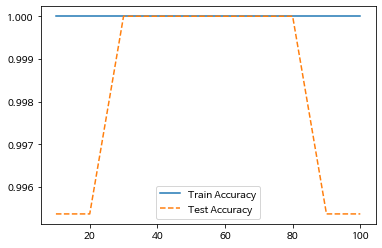

In [ ]:
plt.plot(para_split, train_accuracy, linestyle='-', label="Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle='--', label="Test Accuracy")
plt.legend()

## train_score와 test_score의 값을 서로 고려하며 분리 노드의 최소 자료 수를 30개로 지정한다.

In [ ]:
#2. 범위 지정
para_depth = [depth for depth in range(1, 11)]
para_leaf = [n_leaf * 2 for n_leaf in range(1,21)]
para_lr = [lr * 0.1 for lr in range(1,11)]

In [ ]:
#3. GridSearchCV를 이용한 최적의 파라미터 찾기
estimator = GradientBoostingClassifier(random_state=1234, n_estimators=80, min_samples_split=30)

param_grid = {"max_depth": para_depth, "min_samples_leaf": para_leaf, "learning_rate": para_lr}

grid_gb = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_gb.fit(df_dummy_train_x, df_dummy_train_y)

print("best estimator model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))

best estimator model: 
GradientBoostingClassifier(max_depth=8, min_samples_leaf=2,
                           min_samples_split=30, n_estimators=80,
                           random_state=1234)

best parameter: 
{'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 2}

best score: 
0.996


In [ ]:
#4. 최종 모델 선정
gb_final = GradientBoostingClassifier(random_state=1234, min_samples_leaf=2, min_samples_split=30, max_depth=8, \
                                       n_estimators=80, learning_rate=0.1)
gb_final.fit(df_dummy_train_x, df_dummy_train_y)

GradientBoostingClassifier(max_depth=8, min_samples_leaf=2,
                           min_samples_split=30, n_estimators=80,
                           random_state=1234)

In [ ]:
#5. 최종 모델 평가
y_pred = gb_final.predict(df_dummy_test_x)
print("Train Accuracy: {:.3f}".format(gb_final.score(df_dummy_train_x, df_dummy_train_y)))
print("Test Accuracy: {:.3f}".format(gb_final.score(df_dummy_test_x, df_dummy_test_y)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_dummy_test_y, y_pred)))
print(classification_report(df_dummy_test_y, y_pred, digits=3))

Train Accuracy: 1.000
Test Accuracy: 0.991
Confusion Matrix: 
[[144   1]
 [  1  70]]
              precision    recall  f1-score   support

           0      0.993     0.993     0.993       145
           1      0.986     0.986     0.986        71

    accuracy                          0.991       216
   macro avg      0.990     0.990     0.990       216
weighted avg      0.991     0.991     0.991       216



In [ ]:
#6. 결론 도출(1) - 설명변수의 중요도 결과

#변수명 저장
v_feature_name = df_dummy_train_x.columns

df_importance= pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

#df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
10,ROLLING_TEMP_T5,0.559
11,ROLLING_DESCALING,0.124
6,FUR_SZ_TEMP,0.118
25,HSB_미적용,0.103
26,HSB_적용,0.046
0,PT_THICK,0.031
8,FUR_TIME,0.008
2,PT_LENGTH,0.002
1,PT_WIDTH,0.002
3,PT_WEIGHT,0.002


Text(0, 0.5, 'Feature')

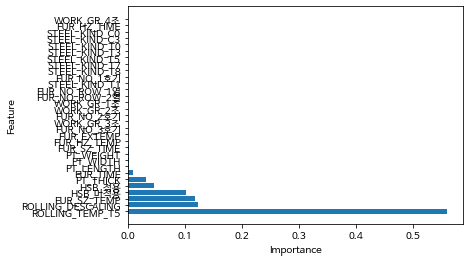

In [ ]:
#6. 결론 도출(2) - 설명변수 중요도 그래프
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Importance")
plt.ylabel("Feature")

# ROLLING_TEMP_T5, ROLLING_DESCALING, FUR_SZ_TEMP, HSB 미적용 순으로 목표변수 SCALE에 영향을 주는 주요요인으로 뽑을 수 있다.

# 9. SVM
## 파라미터 조정을 통해 최적의 모델을 찾는 과정을 진행한다. 이때, "Scaling만 적용한 더미변수" 데이터를 사용한다.

In [ ]:
#1. 범위 지정
para_c = [10 ** c for c in range(-2, 2)]
para_gamma = [10 ** gamma for gamma in range(-2,2)]

In [ ]:
#2. GridSearchCV를 이용한 최적의 파라미터 찾기
estimator = SVC(random_state=1234)

param_grid = {"C":para_c, "gamma":para_gamma}

grid_svm = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs = -1)
grid_svm.fit(x_scaled_train, df_dummy_train_y)

print("best estimator model: \n{}".format(grid_svm.best_estimator_))
print("\nbest parameter: \n{}".format(grid_svm.best_params_))
print("\nbest score: \n{}".format(grid_svm.best_score_.round(3)))

best estimator model: 
SVC(C=1, gamma=0.01, random_state=1234)

best parameter: 
{'C': 1, 'gamma': 0.01}

best score: 
0.877


In [ ]:
#3. 최종 모델 선정
svc_final = SVC(gamma=0.01, C=1, random_state= 1234)
svc_final.fit(x_scaled_train, df_dummy_train_y)

SVC(C=1, gamma=0.01, random_state=1234)

In [ ]:
#4. 최종 모델 평가
y_pred = svc_final.predict(x_scaled_test)
print("Train Accuracy: {:.3f}".format(svc_final.score(x_scaled_train, df_dummy_train_y)))
print("Test Accuracy: {:.3f}".format(svc_final.score(x_scaled_test, df_dummy_test_y)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_dummy_test_y, y_pred)))
print(classification_report(df_dummy_test_y, y_pred, digits=3))

Train Accuracy: 0.893
Test Accuracy: 0.880
Confusion Matrix: 
[[135  10]
 [ 16  55]]
              precision    recall  f1-score   support

           0      0.894     0.931     0.912       145
           1      0.846     0.775     0.809        71

    accuracy                          0.880       216
   macro avg      0.870     0.853     0.860       216
weighted avg      0.878     0.880     0.878       216



# 10. KNN
## 파라미터 조정을 통해 최적의 모델을 찾는 과정을 진행한다. 이때, "Scaling만 적용한 더미변수" 데이터를 사용한다.

In [ ]:
#1. 모델 파라미터 조정(1) - n_neighbors

test_accuracy = []
train_accuracy = []

para_n_neighbors = [neighbor for neighbor in range(1,41)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(x_scaled_train, df_dummy_train_y)
    train_accuracy.append(knn.score(x_scaled_train, df_dummy_train_y))
    test_accuracy.append(knn.score(x_scaled_test, df_dummy_test_y))
    
#결과 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors['Neighbors'] = para_n_neighbors
df_accuracy_neighbors['TrainAccuracy'] = train_accuracy
df_accuracy_neighbors['TestAccuracy'] = test_accuracy

#모델 설명력 확인
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.792
1,2,0.881,0.769
2,3,0.905,0.806
3,4,0.863,0.810
4,5,0.887,0.810
5,6,0.863,0.806
6,7,0.879,0.778
7,8,0.853,0.796
8,9,0.859,0.787
9,10,0.837,0.796


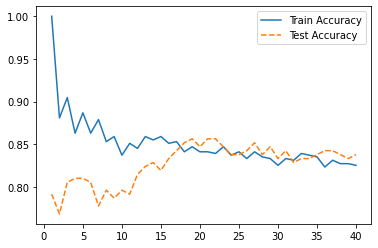

In [ ]:
plt.plot(para_n_neighbors, train_accuracy, linestyle='-', label="Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle='--', label="Test Accuracy")
plt.legend()

In [ ]:
#2. 범위 지정
para_weights = ["uniform", "distance"]
para_metrics = ["minkowski", "euclidean", "manhattan"]

In [ ]:
#3. GridSearchCV를 이용한 최적의 파라미터 찾기
estimator = KNeighborsClassifier(n_neighbors=22)

param_grid = {"weights": para_weights, "metric": para_metrics}

grid_knn = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs = -1)
grid_knn.fit(x_scaled_train, df_dummy_train_y)

print("best estimator model: \n{}".format(grid_knn.best_estimator_))
print("\nbest parameter: \n{}".format(grid_knn.best_params_))
print("\nbest score: \n{}".format(grid_knn.best_score_.round(3)))

best estimator model: 
KNeighborsClassifier(metric='manhattan', n_neighbors=22, weights='distance')

best parameter: 
{'metric': 'manhattan', 'weights': 'distance'}

best score: 
0.837


In [ ]:
#4. 최종 모델 선정
knn_final = KNeighborsClassifier(n_neighbors=22, weights="distance", metric="manhattan")
knn_final.fit(x_scaled_train, df_dummy_train_y)

KNeighborsClassifier(metric='manhattan', n_neighbors=22, weights='distance')

In [ ]:
#5. 최종 모델 평가
y_pred = knn_final.predict(df_dummy_test_x)
print("Train Accuracy: {:.3f}".format(knn_final.score(x_scaled_train, df_dummy_train_y)))
print("Test Accuracy: {:.3f}".format(knn_final.score(x_scaled_test, df_dummy_test_y)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_dummy_test_y, y_pred)))
print(classification_report(df_dummy_test_y, y_pred, digits=3))

Train Accuracy: 1.000
Test Accuracy: 0.856
Confusion Matrix: 
[[ 14 131]
 [  8  63]]
              precision    recall  f1-score   support

           0      0.636     0.097     0.168       145
           1      0.325     0.887     0.475        71

    accuracy                          0.356       216
   macro avg      0.481     0.492     0.322       216
weighted avg      0.534     0.356     0.269       216



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
